# (3주차-1) 11월26일
- 주제: 모델 파이프라인 짜보기
- 작성자: 윤도현

In [33]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose, ToPILImage
import matplotlib.pyplot as plt

### 이미지 불러와주는 라이브러리 (무시가능) ### 

In [1]:
from fastai.data.all import *
from fastai.vision.all import * 

### torchvision.datasets에서 제공하는 데이터셋 목록

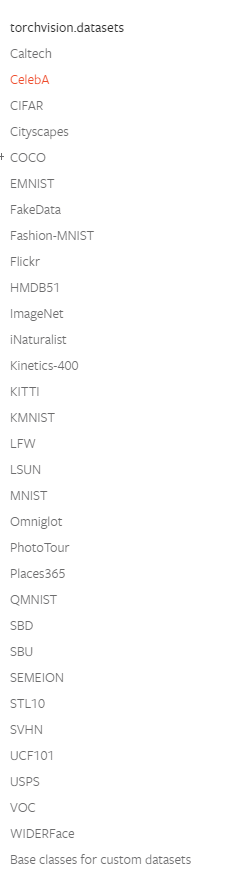

In [2]:
PILImage.create('11111111.PNG')

# 1. 데이터셋 불러오기

In [2]:
# 공개 데이터셋에서 학습 데이터를 내려받습니다.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# 공개 데이터셋에서 테스트 데이터를 내려받습니다.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

C:\Users\user\anaconda3\envs\bda2021\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


### dataset 훔쳐보기

In [21]:
X.shape, y.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

In [23]:
X,y

(tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

### datasets.FashionMNIST 인자 훔쳐보기

In [47]:
datasets.FashionMNIST?

Init signature: datasets.FashionMNIST(*args, **kwds)
Docstring:     
`Fashion-MNIST <https://github.com/zalandoresearch/fashion-mnist>`_ Dataset.

Args:
    root (string): Root directory of dataset where ``FashionMNIST/processed/training.pt``
        and  ``FashionMNIST/processed/test.pt`` exist.
    train (bool, optional): If True, creates dataset from ``training.pt``,
        otherwise from ``test.pt``.
    download (bool, optional): If true, downloads the dataset from the internet and
        puts it in root directory. If dataset is already downloaded, it is not
        downloaded again.
    transform (callable, optional): A function/transform that  takes in an PIL image
        and returns a transformed version. E.g, ``transforms.RandomCrop``
    target_transform (callable, optional): A function/transform that takes in the
        target and transforms it.
File:           c:\users\user\anaconda3\envs\bda2021\lib\site-packages\torchvision\datasets\mnist.py
Type:           type
Subcl

### data 폴더 파일목록 훔쳐보기

In [48]:
ls data  

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: FCD5-95C9

 C:\Users\user\data 디렉터리

2021-11-26  오전 11:05    <DIR>          .
2021-11-26  오전 11:05    <DIR>          ..
2021-11-26  오전 11:05    <DIR>          FashionMNIST
               0개 파일                   0 바이트
               3개 디렉터리  1,653,937,725,440 바이트 남음


# 2. 불러온 데이터셋으로 데이터 로더 생성

In [4]:
batch_size = 64

# 데이터로더를 생성합니다.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


# 3. 모델 만들기

### class를 도입하면 하나의 클래스를 통해 여러개의 객체를 생성 함으로써 

### 코드의 반복을 줄일 수 있다

In [12]:
# 학습에 사용할 CPU나 GPU 장치를 얻습니다.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

class NeuralNetwork(nn.Module):
# layer 정의
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )
# 신경망에 데이터를 어떻게 전달할지 정의
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


### nn.Linear 인자 훔쳐보기

In [11]:
nn.Linear?

Init signature:
nn.Linear(
    in_features: int,
    out_features: int,
    bias: bool = True,
    device=None,
    dtype=None,
) -> None
Docstring:     
Applies a linear transformation to the incoming data: :math:`y = xA^T + b`

This module supports :ref:`TensorFloat32<tf32_on_ampere>`.

Args:
    in_features: size of each input sample
    out_features: size of each output sample
    bias: If set to ``False``, the layer will not learn an additive bias.
        Default: ``True``

Shape:
    - Input: :math:`(N, *, H_{in})` where :math:`*` means any number of
      additional dimensions and :math:`H_{in} = \text{in\_features}`
    - Output: :math:`(N, *, H_{out})` where all but the last dimension
      are the same shape as the input and :math:`H_{out} = \text{out\_features}`.

Attributes:
    weight: the learnable weights of the module of shape
        :math:`(\text{out\_features}, \text{in\_features})`. The values are
        initialized from :math:`\mathcal{U}(-\sqrt{k}, \sqrt{k})`, w

# 4. 손실함수, 옵티마이저 정의 

In [13]:
loss_fn =nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(model.parameters(), lr= 1e-3)

In [14]:
1e-3

0.001

In [15]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # 예측 오류 계산
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

### test 데이터셋으로 모델의 성능 확인

In [17]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

# 5. Training

In [25]:
epochs = 200
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 1.341803  [    0/60000]
loss: 1.414391  [ 6400/60000]
loss: 1.120190  [12800/60000]
loss: 1.121604  [19200/60000]
loss: 1.361351  [25600/60000]
loss: 1.065126  [32000/60000]
loss: 1.411634  [38400/60000]
loss: 1.330144  [44800/60000]
loss: 1.434133  [51200/60000]
loss: 1.288628  [57600/60000]
Test Error: 
 Accuracy: 60.1%, Avg loss: 1.259844 

Epoch 2
-------------------------------
loss: 1.340176  [    0/60000]
loss: 1.412698  [ 6400/60000]
loss: 1.119317  [12800/60000]
loss: 1.120391  [19200/60000]
loss: 1.359872  [25600/60000]
loss: 1.062699  [32000/60000]
loss: 1.410056  [38400/60000]
loss: 1.329252  [44800/60000]
loss: 1.433842  [51200/60000]
loss: 1.287258  [57600/60000]
Test Error: 
 Accuracy: 60.1%, Avg loss: 1.258793 

Epoch 3
-------------------------------
loss: 1.338544  [    0/60000]
loss: 1.411074  [ 6400/60000]
loss: 1.118520  [12800/60000]
loss: 1.119171  [19200/60000]
loss: 1.358127  [25600/60000]
loss: 1.060794  [32000/600

# 6. 모델 저장하기

In [26]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [27]:
torch.save?

Signature:
torch.save(
    obj,
    f: Union[str, os.PathLike, BinaryIO, IO[bytes]],
    pickle_module=<module 'pickle' from 'C:\\Users\\user\\anaconda3\\envs\\bda2021\\lib\\pickle.py'>,
    pickle_protocol=2,
    _use_new_zipfile_serialization=True,
) -> None
Docstring:
save(obj, f, pickle_module=pickle, pickle_protocol=DEFAULT_PROTOCOL, _use_new_zipfile_serialization=True)

Saves an object to a disk file.

See also: :ref:`saving-loading-tensors`

Args:
    obj: saved object
    f: a file-like object (has to implement write and flush) or a string or
       os.PathLike object containing a file name
    pickle_module: module used for pickling metadata and objects
    pickle_protocol: can be specified to override the default protocol

.. note::
    A common PyTorch convention is to save tensors using .pt file extension.

.. note::
    PyTorch preserves storage sharing across serialization. See
    :ref:`preserve-storage-sharing` for more details.

.. note::
    The 1.6 release of PyTorch

# 7. 모델 불러오기

In [28]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

## 불러온 모델을 이용한 예측

In [29]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


## 테스트 데이터 시각화 (tensor를 PILImage로 변환)

In [37]:
tf = ToPILImage()
img_t = tf(test_data[0][0])
img_t.show()

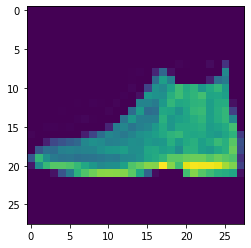

In [38]:
plt.imshow(img_t)

In [45]:
test_data[0][1]

9

# (3주차-2) 11월26일
- 주제: 텐서
- 작성자: 윤도현

pytorch에서는 텐서를 사용하여 모델의 입력,출력 그리고 모델의 매개변수들을 encode 한다. (encoding이란 사람의 언어를 컴퓨터가 이해할 수 있는 언어로 변환하는 과정)

In [46]:
import torch
import numpy as np

# 1. 텐서 초기화

`-` 데이터로부터 직접 텐서 생성하기

In [47]:
data = [[1,2],[3,4]]
x_data = torch.tensor(data)

In [55]:
x_data

tensor([[1, 2],
        [3, 4]])

`-` Numpy 배열로부터 텐서 생성하기

In [48]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [56]:
x_np

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

`-` 다른 텐서로부터 텐서 생성하기

In [49]:
x_ones = torch.ones_like(x_data) # x_data의 속성을 유지합니다.
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # x_data의 속성을 덮어씁니다.
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.9338, 0.0484],
        [0.2330, 0.4096]]) 



`-` 무작위(random) 또는 상수(constant)값 사용하기

In [57]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

rand_tensor, ones_tensor, zeros_tensor

(tensor([[0.0270, 0.6254, 0.6863],
         [0.1242, 0.6509, 0.8563]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[0., 0., 0.],
         [0., 0., 0.]]))

# 2. 텐서의 속성

`-` 텐서의 속성은 텐서의 모양, 자료형, 어느 장치에 저장되는지 나타낸다.

In [58]:
tensor= torch.rand(3,4)

tensor.shape, tensor.dtype, tensor.device

(torch.Size([3, 4]), torch.float32, device(type='cpu'))

# 3. 텐서 연산

`-` 전치(Transposing), 인덱싱(indexing), 슬라이싱(slicing), 수학계산, 선형 대수, 임의 샘플링 등 100가지 이상의 텐서 연산 가능

`-` 기본적으로 텐서는 cpu에 생성된다.

`-` .to api를 사용하면 gpu로 텐서를 이동시킬 수 있다.

## cpu에 있는 텐서를 gpu로 보내기

In [59]:
if torch.cuda.is_available():
    tensor = tensor.to('cuda')

## numpy식의 표준 인덱싱과 슬라이싱

In [62]:
tensor = torch.ones(4, 4)
print(tensor)
print('First row: ',tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:,1] = 0
print(tensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


## 텐서 합치기

In [61]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


## 산술 연산

In [65]:
# 두 텐서 간의 행렬 곱
y1 = tensor@ tensor.T
y2 = tensor.matmul(tensor.T)
y3 = torch.rand_like(tensor)
torch.matmul(tensor,tensor.T,out=y3)

#요소별 곱
z1 = tensor * tensor
z2 = tensor.mul(tensor)
z3 = torch.rand_like(tensor)
torch.mul(tensor,tensor,out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

## 단일요소 텐서

`-` 텐서의 모든값이 하나로 집계(aggregate)되어 요소가 하나인 텐서

In [74]:
agg = tensor.sum()
agg_item = agg.item()

agg_item, type(agg_item)

(12.0, float)

## 바꿔치기 연산

`-` 연산결과를 피연산자에 저장하는 연산

In [75]:
tensor

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [76]:
tensor.add_(5)
tensor

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])

# 4. Numpy 변환

`-` cpu 상의 텐서와 Numpy 배열은 메모리 공간을 공유하기 때문에 하나만 변경해도 다른 하나도 변경된다.

In [77]:
t= torch.ones(5)
n= t.numpy()

t, n

(tensor([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.], dtype=float32))

In [78]:
t.add_(1)
t, n 

(tensor([2., 2., 2., 2., 2.]), array([2., 2., 2., 2., 2.], dtype=float32))

## Numpy 배열을 텐서로 변환하기

In [83]:
n = np.ones(5)
t = torch.from_numpy(n)

In [84]:
np.add(n,1)
t, n

(tensor([1., 1., 1., 1., 1.], dtype=torch.float64),
 array([1., 1., 1., 1., 1.]))

In [85]:
np.add?

Call signature:  np.add(*args, **kwargs)
Type:            ufunc
String form:     <ufunc 'add'>
File:            c:\users\user\anaconda3\envs\bda2021\lib\site-packages\numpy\__init__.py
Docstring:      
add(x1, x2, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Add arguments element-wise.

Parameters
----------
x1, x2 : array_like
    The arrays to be added.
    If ``x1.shape != x2.shape``, they must be broadcastable to a common
    shape (which becomes the shape of the output).
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or None,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.
where : array_like, optional
    This condition is broadcast over the input. At locations where the
    condition i

# (3주차-3) 11월26일
- 주제: Dataset과 Dataloader
- 작성자: 윤도현

# 1. 데이터셋 불러오기

In [86]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

## Dataset과 DataLoader 함수 사용하는 이유??

### 결론부터 말하자면 "Customizing" 하기 위해서
### 딥러닝 모델을 학습시킬때 데이터셋을 가져와야 하는데 한번에 모든 데이터를 가져오면 gpu 메모리가 터져버리는 일이 생긴다.
### 그래서 batch를 나눠서 모델에 입력을 해주는데 어떤 데이터를 가져오고, 어떤 형태로 가져오고, 한 번에 얼마나 가져올지 customzing 하기 위해 torch에 dataset과 dataloader를 사용한다.

In [87]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

# 2. 데이터셋 직접 접근 및 시각화

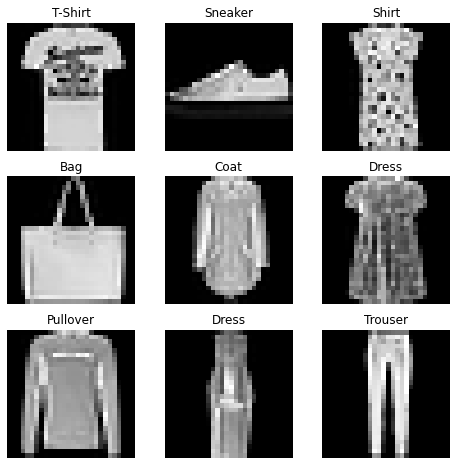

In [91]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# 3. 사용자 정의 데이터셋 만들기

`-` 우리가 가장 관심있고 배워야하는 부분! 

`-` 사용자 정의 dataset 클래스는 반드시 3개의 함수를 포함해야 함(__ init __, __ len __ and __ getitem __)

`-` FashionMNIST 이미지들은 img_dir 디렉토리에 저장되고 정답은 annotations_file csv파일에 별도로 저장된다.

In [93]:
import os
import pandas as pd
from torchvision.io import read_image

## Custom Dataset 정의

In [94]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self,idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx,0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx,1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label= self.target_transform(label)
        return image, label

## __ init __

`-` initialize 라는 이름 그대로 인스턴스(객체)를 초기화

`-` __ init __ 함수는 Dataset 객체가 생성될 떄 한번만 실행된다

`-` 여기서는 이미지와 주석파일(annotation file)이 포함된 디렉토리와 두가지 Transform을 초기화한다.

## __ len __

`-` 데이터셋의 샘플 개수를 반환한다.

## __ getitem __

`-` __ getitem __ 함수는 주어진 인덱스 idx에 해당하는 샘플을 데이터셋에서 불러오고 반환한다.

`-` 인덱스를 기반으로 디스크에서 이미지의 위치를 식별하고, read_image 함수를 사용하여 이미지를 텐서로 변환하고, self.img_labels의 csv 데이터로부터 해당하는 정답(label)을 가져오고, 변형 함수들을 호출한 뒤, 텐서 이미지와 라벨을 python dictionary 형으로 반환한다.

# 4. DataLoader로 학습용 데이터 준비하기

`-` 앞서 설명한 Dataset은 데이터셋의 __특징(feature)과__ 하나의 샘플에 __정답(label)을__ 지정하는 일을 동시에 했음

`-` 모델을 학습할때 일반적으로 데이터를 batch로 묶어 전달하고, 매 epoch마다 데이터를 다시 mix해서 과적합(overfitting)을 방지했다.

`-` DataLoader 함수는 이러한 많은 작업을 하나의 api로 가능하도록 해주는 아주 좋은놈! 

In [97]:
from torch.utils.data import DataLoader 

train_dl = DataLoader(training_data, batch_size=64, shuffle=True)
test_dl = DataLoader(test_data, batch_size=64, shuffle=True)

# 5. DataLoader를 통해 batch로 묶고 iteration 하기

- 만약 데이터셋의 크기가 1024이고 batch_size= 32라고 가정해보자  

- 하나의 batch는 32개의 데이터를 포함하고 총 32개의 batch로 묶이게 된다.

- 전체 데이터셋을 학습할때 batch로 묶어 학습하게 되면 1 epoch은 32번의 iteration으로 구성된다.

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


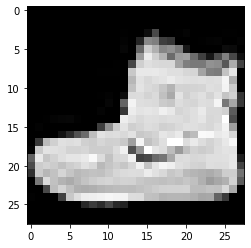

Label: 9


In [98]:
# 이미지와 정답(label)을 표시합니다.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# 6. 변형(Transform)

`-` 데이터가 항상 바로 모델에 학습시킬 수 있도록 깔끔하게 주어지는 경우는 거의 없다.

`-` 변형(transform)을 해서 데이터를 조작하고 학습에 적합하게 만드는 과정이 필수!! 

`-` torchvision에서 특징(feature)을 변경해주는 transform 함수, 정답(label)을 변경해주는 target_transform 함수를 제공한다.

`-` FashionMNIST 데이터셋의 특징(feature)은 PIL Image 형식이고, 정답(label)은 정수이다.

## 이대로 학습 ? == 불가능

`-` 특징을 정규화된 텐서 형태로 변환 $  \to  $ torchvision.transforms.ToTensor

`-` 정답을 one-hot encoding $  \to  $ torchvision.transform.Lambda

In [99]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

## 이게 뭐한거냐?

## ToTensor()

`-` ToTensor는 PIL Image나 Numpy 배열을 FloatTensor로 변환하고, 이미지의 픽셀의 크기 값을 (0~1) 범위로 비례 조정한다.

## Lambda()

`-` Lambda는 정수를 one-hot encoding 해준다.

`-` 먼저 데이터셋 정답개수 크기의 zero tensor를 만든다.

`-` 그다음 scatter_를 호출하여 주어진 정답 y에 해당하는 인덱스에 value=1을 할당한다.

In [100]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))